In [1]:
import os
os.getcwd

<function nt.getcwd()>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [3]:
df=pd.read_csv(r"C:\Users\abhin\FSDS_Projects\Height_Weight_Project\SOCR-HeightWeight.csv")
df

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971
...,...,...,...
24995,24996,69.50215,118.0312
24996,24997,64.54826,120.1932
24997,24998,64.69855,118.2655
24998,24999,67.52918,132.2682


In [4]:
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [5]:
df['Weight_kg']=df['Weight(Pounds)']*0.453592   # 1 pound=453 grams
df['Height(Feet_Inches)']=df['Height(Inches)']//12 + (df['Height(Inches)']%12)/10

In [6]:
df.describe()

,Index,Height(Inches),Weight(Pounds),Weight_kg,Height(Feet_Inches)
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,12500.500000,67.993114,127.079421,57.642209,5.795967
std,7217.022701,1.901679,11.660898,5.289290,0.183513
min,1.000000,60.278360,78.014760,35.386871,5.027836
25%,6250.750000,66.704397,119.308675,54.117461,5.670440
50%,12500.500000,67.995700,127.157750,57.677738,5.799570
75%,18750.250000,69.272958,134.892850,61.186318,5.927296
max,25000.000000,75.152800,170.924000,77.529759,6.315280


In [7]:
drop_col=['Index','Height(Inches)','Weight(Pounds)']
df=df.drop(columns=drop_col,axis=1)

In [8]:
df.sample(3)

,Weight_kg,Height(Feet_Inches)
10371,66.343318,5.852314
3103,59.658461,5.442244
11155,54.039862,5.701140


In [9]:
df.shape

(25000, 2)

In [10]:
df.isna().any()

Weight_kg              False
Height(Feet_Inches)    False
dtype: bool

In [13]:
df.dtypes

Weight_kg              float64
Height(Feet_Inches)    float64
dtype: object

In [14]:
df.corr()

,Weight_kg,Height(Feet_Inches)
Weight_kg,1.000000,0.499192
Height(Feet_Inches),0.499192,1.000000


In [15]:
df.describe()

,Weight_kg,Height(Feet_Inches)
count,25000.000000,25000.000000
mean,57.642209,5.795967
std,5.289290,0.183513
min,35.386871,5.027836
25%,54.117461,5.670440
50%,57.677738,5.799570
75%,61.186318,5.927296
max,77.529759,6.315280


<Axes: xlabel='Height(Feet_Inches)'>

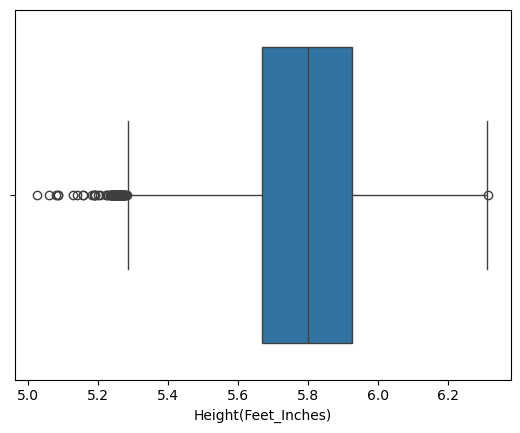

In [17]:
sns.boxplot(x=df['Height(Feet_Inches)'])

<Axes: xlabel='Weight_kg'>

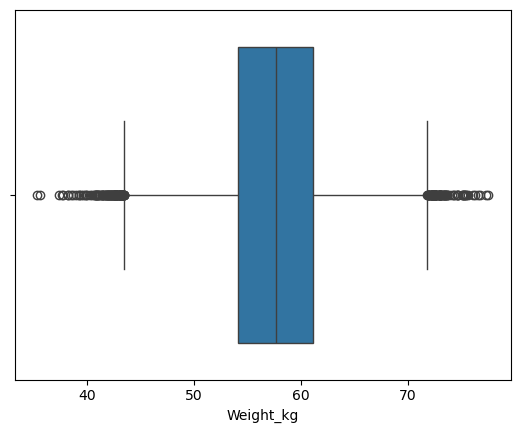

In [18]:
sns.boxplot(x=df['Weight_kg'])

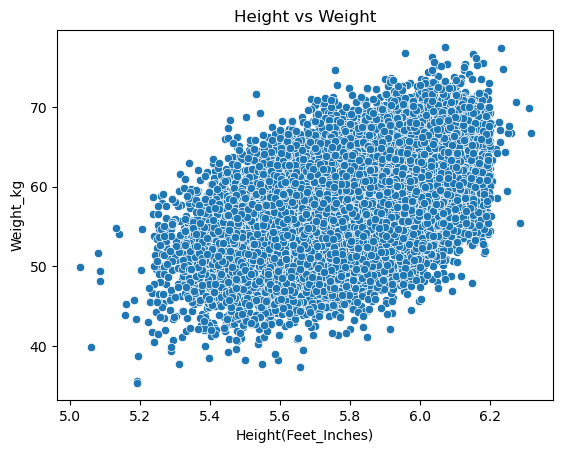

In [19]:
x=df['Height(Feet_Inches)']
y=df['Weight_kg']
sns.scatterplot(x=x,y=y)
plt.title('Height vs Weight')
plt.xlabel('Height(Feet_Inches)')
plt.ylabel('Weight_kg')
plt.show()

In [20]:
df.sample(3)

,Weight_kg,Height(Feet_Inches)
16361,56.863155,5.681505
8212,58.496585,5.935277
17168,63.512451,5.825275


In [21]:
x=df.iloc[:,1]
y=df.iloc[:,0]

In [22]:
x

0        5.578331
1        6.151521
2        5.939874
3        5.821660
4        5.778781
           ...   
24995    5.950215
24996    5.454826
24997    5.469855
24998    5.752918
24999    5.887761
Name: Height(Feet_Inches), Length: 25000, dtype: float64

In [24]:
df.columns[1]

'Height(Feet_Inches)'

In [25]:
df.columns[0]

'Weight_kg'

In [26]:
scaler_x=StandardScaler()
x_scaled=scaler_x.fit_transform(x.values.reshape(-1,1))

scaler_y=StandardScaler()
y_scaled=scaler_y.fit_transform(y.values.reshape(-1,1))

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [29]:
print('shape of training data')
print(x_train.shape)
print(y_train.shape)

print('shape of testing data')
print(x_test.shape)
print(y_test.shape)

shape of training data
(20000,)
(20000,)
shape of testing data
(5000,)
(5000,)


In [31]:
x_train_2d=x_train.values.reshape(-1,1)
y_train_2d=y_train.values.reshape(-1,1)

x_test_2d=x_test.values.reshape(-1,1)
y_test_2d=y_test.values.reshape(-1,1)

print('Shape of training data (x):',x_train_2d.shape)
print('Shape of training data (y):',y_train_2d.shape)
print('Shape of testing data (x):',x_test_2d.shape)
print('Shape of testing data (y):',x_test_2d.shape)

Shape of training data (x): (20000, 1)
Shape of training data (y): (20000, 1)
Shape of testing data (x): (5000, 1)
Shape of testing data (y): (5000, 1)


In [32]:
lr=LinearRegression()
lr

LinearRegression()

In [33]:
lr.fit(x_train_2d,y_train_2d)

LinearRegression()

In [34]:
y_pred=lr.predict(x_test_2d)
y_pred[:10]

array([[55.94425481],
       [60.91226889],
       [56.56867714],
       [56.42643564],
       [51.52547113],
       [52.93798976],
       [60.30463034],
       [60.27256006],
       [62.74472434],
       [63.0616341 ]])

In [35]:
y_test_2d[:10]

array([[60.87349789],
       [64.25661383],
       [50.63170805],
       [53.62895327],
       [46.5397639 ],
       [48.20970821],
       [55.81821505],
       [55.03481631],
       [76.60307055],
       [55.98708736]])

In [36]:
mean_squared_error(y_pred,y_test_2d)

21.69730652290755

In [37]:
model_dtr=DecisionTreeRegressor()
model_dtr

DecisionTreeRegressor()

In [38]:
model_dtr.fit(x_train_2d,y_train_2d)

DecisionTreeRegressor()

In [39]:
y_pred_dtr=model_dtr.predict(x_test_2d)
y_pred_dtr[:5]

array([63.37542065, 56.46639802, 56.7162365 , 64.71347169, 57.84078178])

In [40]:
mean_squared_error(y_pred_dtr,y_test_2d)

41.50751860513505

In [41]:
model_rfr=RandomForestRegressor()
model_rfr.fit(x_train_2d,y_train_2d)

c:\Users\abhin\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [42]:
y_pred_rfr=model_rfr.predict(x_test_2d)
y_pred_rfr[:5]

array([59.21374036, 57.76225276, 56.86128025, 61.34036925, 55.83625532])

In [43]:
mean_squared_error(y_pred_rfr,y_test_2d)

31.222767051076143

In [46]:
from sklearn.model_selection import GridSearchCV

param_grid= {
    'fit_intercept': [True,False],
    'copy_X' : [True,False]
}

model_lr=LinearRegression()
grid_search=GridSearchCV(model_lr,param_grid,cv=5,scoring='neg_mean_squared_error')
grid_search.fit(x_train_2d,y_train_2d)

print('Best Parameters:',grid_search.best_params_)
print("Best Negative MSE Score:",grid_search.best_score_)

Best Parameters: {'copy_X': True, 'fit_intercept': True}
Best Negative MSE Score: -20.836260216566203


In [47]:
from sklearn.model_selection import cross_val_score
model_lr=LinearRegression()
accuracy_scores=cross_val_score(model_lr,x_train_2d,y_train_2d,cv=10,scoring='neg_mean_squared_error')
mse_scores=-accuracy_scores

print("MSE Scores:",mse_scores)

MSE Scores: [21.65411512 21.79844701 20.33072238 21.2128048  21.84713487 20.47547042
 20.38317103 20.4544885  21.45193422 18.76081422]


In [48]:
final_model=LinearRegression(fit_intercept=False,copy_X=True)
final_model.fit(x_train_2d,y_train_2d)

LinearRegression(fit_intercept=False)

In [49]:
import pickle
filename='final_model.pkl'
with open(filename,'wb') as file:
    pickle.dump(final_model,file)

In [50]:
os.path.abspath('final_model.pkl')

'c:\\Users\\abhin\\FSDS_Projects\\Height_Weight_Project\\final_model.pkl'

In [51]:
with open(filename,'rb') as file:
    loaded_model=pickle.load(file)

height_input=6.0
height_input_2d=np.array(height_input).reshape(1,-1)
predicted_weight=loaded_model.predict(height_input_2d)
print('Predicted weight:',predicted_weight[0,0])

Predicted weight: 59.72023785370342
